# Homework 3: Random Variables and Their Distributions
***

**Name**: 

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday October 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
import math
%matplotlib inline

### [15 points] Problem 1 
***

A young boy and an old woman are playing [tic tac toe](https://en.wikipedia.org/wiki/Tic-tac-toe). Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The boy plays first and randomly places an X in an open square. The woman plays next, and randomly places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, the probability that the boy wins.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely don't be afraid to write helper functions that get called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an $X$ or an $O$ on an free square, or (iii) check if someone has one the game. This problem will not be autograded so feel free to get creative.  Just make sure to clearly display your results in code output and summarize things in Markdown. 

In [2]:
def simulation(n = 100):
    boyWin = 0
    total = 0
    for i in range(n):
        total = total + 1
        if ttt() == 'b':
            boyWin = boyWin + 1
    print("Probability that boy wins: "+str(boyWin/total))
    
    
def ttt():
    board = [[' ' for x in range(3)] for y in range(3)]
    avail = [i for i in range(0, 9)]
    done = False
    winner = ''
    
    while not done:
        index = np.random.choice(avail)
        avail.remove(index)
        board[int(index/3)][int(index%3)] = 'X'
        if check(board):
            done = True
            winner = 'b'
            break
        if not avail:
            winner = 'n'
            done = True
            break
        index = np.random.choice(avail)
        avail.remove(index)
        board[int(index/3)][int(index%3)] = 'O'
        if check(board):
            done = True
            winner = 'w'
        if not avail:
            winner = 'n'
            done = True
            
    #for row in board:
    #    print(row)
    #print('\n')            
    return winner
            
def check(board):
    win = False
    for row in board:
        if row == ['X','X','X'] or row == ['O','O','O']:
            win = True
    for i in range(3):
        vertical = [column[i] for column in board]
        if vertical == ['X','X','X'] or vertical == ['O','O','O']:
            win = True
    diag1 = [board[0][0], board[1][1], board[2][2]]
    diag2 = [board[0][2], board[1][1], board[2][0]]
    if diag1 == ['X','X','X'] or diag1 == ['O','O','O'] or diag2 == ['X','X','X'] or diag2 == ['O','O','O']:
        win = True
    return win
simulation(10000)

    

Probability that boy wins: 0.589


As we can see from the result of 10000 simulations of tic tac toe, the probability of the boy winning is higher than that of the old woman since his probability is over 0.5. This makes sense because since the boy goes first, if a match were to go until the entire board fills up, the boy would have 5 'X' on the board and the old woman would only have 4 'O'. It's easier to have 3 in a row if you have more pieces on the board. Even throughout each of the boy's turn before they fill out the board, the boy will always have either one more than the old woman or the same amount of pieces on the board. Therefore, the boy has higher probability of winning than the old woman.

### [20 points] Problem 2 
***

Let $X$ be the lifespan (in years) of a BF Goodrich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{10}{cx^2} & 1 \leq x \leq 10 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

For f(x) to be a valid density function, the total area underneath it needs to be 1 total because it describes a probabilty. 
So, we must find the value of c that makes the integral of f(x) evaluate to 1 in the entire range of possible x. Since f(x) is 0 when x is below 1 and above 10, we only need to calcualte the area underneath the line f(x) from $1 \leq x \leq 10$
\begin{align}
\int_{1}^{10} \frac{10}{cx^2} dx &= -\frac{10}{10c} + \frac{10}{c}\\
                                 &= \frac{9}{c} \\
                                 &= 1
\end{align}

Therefore, $c$ = 9 for $f(x)$ to be a valid density function.

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

$F(y) = P(X \le y) = \int_{-\infty}^{y} \frac{10}{9x^2} dx$

**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 8 years without failing. 

\begin{align}
P(X \le 8) &= F(8)\\
                 &= \int_{1}^{8} \frac{10}{9x^2} + 0\\
                 &= 0.972...
\end{align}
0.972... is the probability that a single tire lasts less than 8 years. The probability it goes longer than 8 years is therefore 1 - 0.972... = 0.027... 


**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $90\%$ of all tires will need to be replaced. In other words, determine the 90th percentile of the distribution of $X$. 

To find out the 90th percentile, we can use our cdf to calculate what value y needs to be for $P(X \le y) = 0.9$
\begin{align}
P(X \le y) &= F(y) \\
&= \int_{1}^{y} \frac{10}{9x^2} dx \\
&= -(\frac{10}{9y} - \frac{10}{9}) \\
&= \frac{10}{9} - \frac{10}{9y} = \frac{9}{10} \\
\end{align}
\begin{align}
\frac{10}{9y} &= \frac{19}{90} \\
y &= \frac{100}{19}
\end{align}
Therefore, within 100/19 years, which is a little over 5 years, 90% of all tires will have to be replaced.

**Part E**: What is the probability that all four BF Goodrich Rugged Trail T/A tires on a vehicle last longer than 8 years without failing? 

Because the event of each tire on a vehicle is independent, we can multiply the probability of each tire lasting longer than 8 years to find out the probability of all four of them lasting longer than 8 years.
\begin{align}
\frac{1}{36}\frac{1}{36}\frac{1}{36}\frac{1}{36} = \frac{1}{36}^4
\end{align}
The probability of all four tires on a vehicle lasting longer than 8 years is $\frac{1}{36}^4$

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [3]:
def pmf_natural(x):
    return np.log10((x+1)/x)

In [4]:
sum = 0
for i in range(1, 10):
    sum = sum + pmf_natural(i)
print("The sum of probabilities for all possibilities of x: "+str(sum))

The sum of probabilities for all possibilities of x: 1.0


We can see that the sum of probabilities for all possibilities of x is 1. Also, we know that log(x) is not negative within the range of $1 \leq x \leq 10$. Therefore, by definition we can argue that f(x) is a well-defined probability mass function.

**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

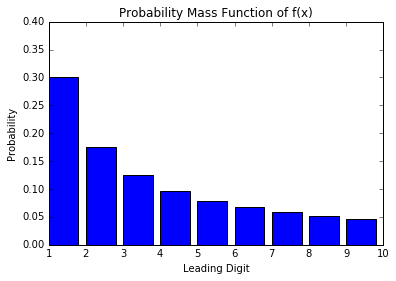

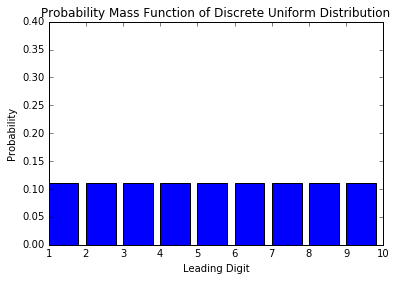

In [5]:
pmf = [pmf_natural(i) for i in range(1, 10)]
ud = [1/9 for x in range(1, 10)]

plt.bar([i for i in range(1, 10)], pmf, color = 'b')
plt.ylim(0, 0.4)
plt.title("Probability Mass Function of f(x)")
plt.xlabel("Leading Digit")
plt.ylabel("Probability")
plt.show()
plt.bar([i for i in range(1, 10)], ud, color = 'b')
plt.ylim(0, 0.4)
plt.title("Probability Mass Function of Discrete Uniform Distribution")
plt.ylabel("Probability")
plt.xlabel("Leading Digit")
plt.show()

We can see the PMF of f(x) is very different from discrete uniform distribution. The probability of f(x) is highest at 1 and decreases as the leading digit increases.

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [6]:
def cdf_natural(y):
    sum = 0
    for i in range(1, y+1):
        sum = sum + pmf_natural(i)
    return sum
print("Probability that leading digit in number is at most 4: "+str(cdf_natural(4)))
print("Probability that leading digit in number is at most 5: "+str(cdf_natural(5)))

Probability that leading digit in number is at most 4: 0.698970004336
Probability that leading digit in number is at most 5: 0.778151250384


We can find the probability of the leading digit in a number being at most 4 and at most 5 by using our cdf_natural function.

**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

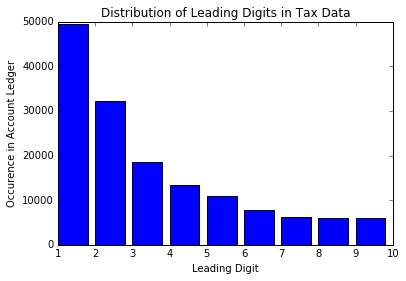

In [7]:
data = pd.read_table("tax_data.txt")
leading = [0 for i in range(1, 10)]
for row in data["Tax Incomes"]:
    number = str(row)
    digit = int(number[0])
    if not digit == 0:
        leading[digit-1] = leading[digit-1] + 1
plt.bar([i for i in range(1, 10)], leading, color = 'b')
plt.title("Distribution of Leading Digits in Tax Data")
plt.xlabel("Leading Digit")
plt.ylabel("Occurence in Account Ledger")
plt.show()

We can see from the figure above that the leading digits of the numbers in the account ledger do not follow a discrete uniform distribution. In fact, the graph shows a very strong resemblance to the first graph that depicts the probability mass function of f(x) from part A. The curve is almost identical. We know that fraudulent data tends to follow the distribution of f(x) so I conclude that the dataset given is fraudulent. 

### [25 points] Problem 4 
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 20 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(20)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 

I would expect the number of boats that cross under the bridge to follow a Poisson Distribution since an Exponential Distribution is a probability distribution that describes the time between events in a Poisson Process. The rate parameter $\lambda$ = 20/day in this problem. Also, it would need a parameter $k$ which is the number of events for which we want to find the probability of occuring. 

**Part B**:  What is the probability that 25 boats cross under the bridge on a particular day?

The Poisson Distribution looks like this: $e^{-\lambda}\frac{\lambda^k}{k!}$

By plugging in the parameters I described above where $k = 25$ now, 
$e^{-20}\frac{20^{25}}{25!} = $
0.0445876491

Therefore, the probability that 25 boats cross under the bridge on a particular day is 0.0445876491.

**Part C**:  What is the probability that 15 boats or fewer cross under the bridge on a particular day?

In [8]:
sum = 0
for k in range(16):
    sum = sum + math.pow(math.e,-20)*math.pow(20,k)/math.factorial(k)
print("Probability that 15 boats or fewer cross under the bridge on a particular day: "+str(sum))

Probability that 15 boats or fewer cross under the bridge on a particular day: 0.1565131346397432


We can add all the probabilities of n boats crossing under the bridge in a particular day where $n\le15$ to find the answer to this question. To find the probability for each n, we simply plug in n as the k parameter in the Poisson Distribution function that we have in Part B with the same rate parameter $\lambda=20$ boats/day. 

**Part D**: What is the probability that between 1 and 2 hours pass between two boat crossings? 

In [9]:
def cdf(time):
    return 1 - math.pow(math.e, -time*20)
print("Probability between 1 and 2 hours pass between two boat crossings"+str(cdf(2/24)-cdf(1/24)))

Probability between 1 and 2 hours pass between two boat crossings0.24572260566951643


We can find the probability of a certain time interval passing between two boat crossings by subtracting the probability of 2 hours passing between two boat crossings by the probability of 1 hour passing between boat crossings. We can find each probability by using the cumulative distribution function of the exponential distribution, which is $1-e^{\lambda x}$ when x is greater than or equal to 0. Since the time unit of the rate parameter is per day, I had to calculate 1 hour and 2 hour relative to its proportion to 24 hours. This is our x parameter.

**Part F**: Write a function boat_count that takes as it's sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function.  

In [10]:
def boat_count(lam):
    time_interval = 0
    total_time = 0
    boats = 0
    while total_time+time_interval < 1:
        total_time = total_time + time_interval
        time_interval = np.random.exponential(1/lam)
        boats = boats + 1
    return boats

To simulate a single day, I continuously called Numpy's random exponential function until the total of the time intervals equaled a day. Each call to the random exponential function represents 1 boat arrival so I added the number of boats each time I called the function.

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 15 boats or fewer cross under the bridge on a particular day. For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function.  

In [11]:
def boat_count_sim(lam, num_days=int(1e3)):
    total = 0
    less16 = 0
    for i in range(num_days):
        boats = boat_count(lam)
        total = total + 1
        if boats <= 15:
            less16 = less16 + 1
    return less16/total
boat_count_sim(20)

0.091

I counted up took the number of boats returned from each boat_count which represents the number of boats arrived in a day and added a counter if the boats were less than 16. Then I divided by the total number of days to get the probability. The estimate appears to be 0.05 different from my by-hand computation on average. I'm not completely sure why. My by-hand computation appears to be an upper-bound to the actual probability. I would guess that this is because I was calculating the probability that was steered lower than the given rate parameter which was 20 boats per day.

**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 1 and 2 hours apart.  For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  


In [12]:
def boat_time_sim(lam, num_boats=int(1e3)): 
    total = 0
    btwn1and2 = 0
    for i in range(num_boats):
        time_interval = np.random.exponential(1/lam)
        total = total + 1
        if (1/24) <= time_interval and time_interval <= (2/24):
            btwn1and2 = btwn1and2 + 1
    return btwn1and2/total
boat_time_sim(20)

0.228

This simulation strongly agrees with my by-hand computation from Part D. I believe this simulation is more accurate than the one from Part G because this range fits around the actual rate parameter. The rate parameter is 20/day which averages to 20/24 boats per hour. 

### [20 points] Problem 5 
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


To win the series on the 8th match played means that I would have to win my 6th win on the 8th match. So, I have to have lost 2 of the 7 preceeding games. To find the probability of this happening, I can find 7 choose 2 to determine the different outcomes of losing in the first 7 games. We can multiply that by the probability of losing the two games and then the probability of winning 6 games. This is mathematically expressed below: 

$\frac{7!}{5!2!}\times(0.45)^2\times(0.55)^6 = 0.11771192425$

Therefore, the probability is 0.11771192425.

**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

Similar to how we solved Part B, this time we have to find the probabilities of winning the series on the 6th match, then 7th, then 8th and on until 11th. No matter how long it takes us, we end when we win 6 games. So the rest of the preceeding games we lose. Therefore, to find the probability of winning the nth match, we can do (n-1) choose (n - 6) multiplied by the probability of winning the 6 games we need to win multiplied by the probablity of losing the games that we would need to lose for the probability of winning on the nth match. Adding the probabilities of all these distinct outcomes will give us the total probability of winning the 11-game series.

Win on 6th match: $\frac{5!}{5!0!}\times(0.45)^0\times(0.55)^6 = 0.02768064062$

Win on 7th match: $\frac{6!}{5!1!}\times(0.45)^1\times(0.55)^6 = 0.07473772968$

Win on 8th match: $\frac{7!}{5!2!}\times(0.45)^2\times(0.55)^6 = 0.11771192425$

Win on 9th match: $\frac{8!}{5!3!}\times(0.45)^3\times(0.55)^6 = 0.1412543091$

Win on 10th match: $\frac{9!}{5!4!}\times(0.45)^4\times(0.55)^6 = 0.14301998797$

Win on 11th match: $\frac{10!}{5!5!}\times(0.45)^5\times(0.55)^6 = 0.12871798917$

Thus the probability of winning the 11-game series is $0.63312258079$.


**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

To win the 11-game series, no matter how the matches play out, I will always have to win 6 games. So, if I win I'm taking home \$9400. However, if I lose, I go home with \$0. So, I can find my expected payout by \$9400 $\times$ chance of winning series + \$0 $\times$ chance of losing. So we can find the expected payout by $9400 $\times$ chance of winning.

$9400\times\frac{5!}{5!0!}\times(0.3)^0\times(0.7)^6 = 9400\times0.117649$

$+$

$9400\times\frac{6!}{5!1!}\times(0.3)^1\times(0.7)^6 = 9400\times0.2117682$

$+$

$9400\times\frac{7!}{5!2!}\times(0.3)^2\times(0.7)^6 = 9400\times0.22235661$

$+$

$9400\times\frac{8!}{5!3!}\times(0.3)^3\times(0.7)^6 = 9400\times0.177885288$

$+$

$9400\times\frac{9!}{5!4!}\times(0.3)^4\times(0.7)^6 = 9400\times0.1200725694$

$+$

$9400\times\frac{10!}{5!5!}\times(0.3)^5\times(0.7)^6 = 9400\times0.07204354164$

$=9400\times0.92177520904 = 8664.68696498$

Therefore, the expected payout for an 11-game series is $8664.68696498

**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


The advantage of choosing a short series is that I don't have to pay Bob as much. Since the prize money for winning the series is flat 10000, I want to pay Bob as less as possible. However, I know that my chances of winning individual games is higher than 0.5. The longer the series, the better my outcomes will converge to that probability. So, I will have better chance of winning the series if I play a longer series.

**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

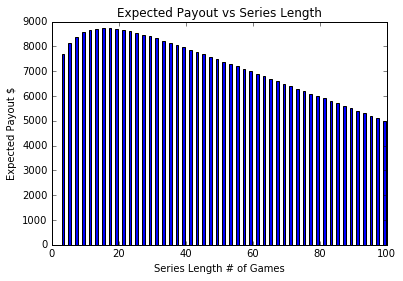

Optimal Series Length:15


In [13]:
def optimal_series(p):
    series_length = []
    expected_payout = []
    for n in range(3, 100, 2):
        series_length.append(n)
        win_game = int(math.ceil(n/2))
        win_prob = 0
        cash = 10000 - win_game * 100
        for i in range(n-win_game, n):
            win_prob = win_prob + math.factorial(i)/(math.factorial(win_game-1)*math.factorial(i-(win_game-1)))*pow(p, win_game)*pow(1-p, i-(win_game-1))
        expected_payout.append(win_prob*cash)
    plt.bar(series_length, expected_payout, color = 'b')
    plt.title("Expected Payout vs Series Length")
    plt.xlabel("Series Length # of Games")
    plt.ylabel("Expected Payout $")
    plt.show()
    return series_length[expected_payout.index(max(expected_payout))]
print("Optimal Series Length:"+str(optimal_series(.7)))

### Challenge Problem - Which Geyser Gushes First? 
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You arrive at the beautiful Three Geysers National Park. You read a placard explaining that the three eponymous geysers — creatively named $A$, $B$ and $C$ — erupt at intervals of precisely two hours, four hours and six hours, respectively. However, you just got there, so you have no idea how the three eruptions are staggered. Assuming they each started erupting at some independently random point in history, what are the probabilities that A, B and C, respectively, will be the first to erupt after your arrival?
